In [ ]:
# Import the necessary libraries.
import os
from zipfile import ZipFile

# Specify the path to the zip file.
zip_path = "/content/ipl_ball_by_ball_data_2008-2023.csv.zip"

# Specify the folder to extract the files to.
target_folder = "/content"

# Open the zip file.
with ZipFile(zip_path, "r") as zip_ref:
    # Extract all the files to the target folder.
    zip_ref.extractall(target_folder)

# Print a success message.
print("Successfully extracted files to", target_folder)

Successfully extracted files to /content


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv('/content/ipl_ball_by_ball_data_2008-2023.csv')

<ipython-input-233-ed1227e653b5>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/ipl_ball_by_ball_data_2008-2023.csv')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243817 entries, 0 to 243816
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   id                 243817 non-null  int64 
 1   season             243817 non-null  object
 2   venue              243817 non-null  object
 3   batting_team       243817 non-null  object
 4   bowling_team       243817 non-null  object
 5   innings            243817 non-null  int64 
 6   over               243817 non-null  int64 
 7   ball               243817 non-null  int64 
 8   is_super_over      243817 non-null  int64 
 9   batter             243817 non-null  object
 10  non_striker        243817 non-null  object
 11  bowler             243817 non-null  object
 12  runs_off_bat       243817 non-null  int64 
 13  runs_from_extras   243817 non-null  int64 
 14  total_runs         243817 non-null  int64 
 15  is_wkt_delivery    243817 non-null  int64 
 16  player_out         1

In [ ]:
df.isnull().sum()

id                        0
season                    0
venue                     0
batting_team              0
bowling_team              0
innings                   0
over                      0
ball                      0
is_super_over             0
batter                    0
non_striker               0
bowler                    0
runs_off_bat              0
runs_from_extras          0
total_runs                0
is_wkt_delivery           0
player_out           231750
wkt_type             231750
fielders_involved    235154
byes                      0
legbyes                   0
wides                     0
noballs                   0
penalty                   0
dtype: int64

In [ ]:
df.dtypes

id                    int64
season               object
venue                object
batting_team         object
bowling_team         object
innings               int64
over                  int64
ball                  int64
is_super_over         int64
batter               object
non_striker          object
bowler               object
runs_off_bat          int64
runs_from_extras      int64
total_runs            int64
is_wkt_delivery       int64
player_out           object
wkt_type             object
fielders_involved    object
byes                  int64
legbyes               int64
wides                 int64
noballs               int64
penalty               int64
dtype: object

In [ ]:
df['batting_team'].unique().sum()

'Kolkata Knight RidersRoyal Challengers BangaloreChennai Super KingsKings XI PunjabRajasthan RoyalsDelhi DaredevilsMumbai IndiansDeccan ChargersKochi Tuskers KeralaPune WarriorsSunrisers HyderabadRising Pune SupergiantsGujarat LionsRising Pune SupergiantDelhi CapitalsPunjab KingsLucknow Super GiantsGujarat Titans'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243817 entries, 0 to 243816
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   id                 243817 non-null  int64 
 1   season             243817 non-null  object
 2   venue              243817 non-null  object
 3   batting_team       243817 non-null  object
 4   bowling_team       243817 non-null  object
 5   innings            243817 non-null  int64 
 6   over               243817 non-null  int64 
 7   ball               243817 non-null  int64 
 8   is_super_over      243817 non-null  int64 
 9   batter             243817 non-null  object
 10  non_striker        243817 non-null  object
 11  bowler             243817 non-null  object
 12  runs_off_bat       243817 non-null  int64 
 13  runs_from_extras   243817 non-null  int64 
 14  total_runs         243817 non-null  int64 
 15  is_wkt_delivery    243817 non-null  int64 
 16  player_out         1

In [ ]:
df['id'].unique()

array([ 335982,  335983,  335984, ..., 1370351, 1370352, 1370353])

In [ ]:
df['id'].nunique()


1024

In [ ]:
df['batter'].nunique()

637

In [ ]:
# Group the DataFrame by 'id' and aggregate the total runs for each team in each match
match_scores = df.groupby('id').agg({
    'batting_team': 'first',
    'bowling_team': 'first',
    'total_runs': 'sum'
}).reset_index()

# Determine the winner of each match
match_scores['winner'] = match_scores.apply(lambda row: row['batting_team'] if row['total_runs'] > 0 else row['bowling_team'], axis=1)

# Print the winner of each match
print("Winner of each match:")
print(match_scores[['id', 'winner']])


Winner of each match:
           id                       winner
0      335982        Kolkata Knight Riders
1      335983          Chennai Super Kings
2      335984             Rajasthan Royals
3      335985               Mumbai Indians
4      335986              Deccan Chargers
...       ...                          ...
1019  1359544  Royal Challengers Bangalore
1020  1370350          Chennai Super Kings
1021  1370351               Mumbai Indians
1022  1370352               Gujarat Titans
1023  1370353               Gujarat Titans

[1024 rows x 2 columns]


In [ ]:
# Assuming df is your DataFrame

# Filter the DataFrame for the match with ID 335982
match_335982 = df[df['id'] == 335982]

# Group the data by the batting team and sum up the total runs scored by each team
team_runs = match_335982.groupby('batting_team')['total_runs'].sum()

# Print the total runs of each team in the match with team name
print("Total runs of each team in match ID 335982:")
for team, runs in team_runs.items():
    print(f"Team: {team}, Total Runs: {runs}")


Total runs of each team in match ID 335982:
Team: Kolkata Knight Riders, Total Runs: 222
Team: Royal Challengers Bangalore, Total Runs: 82


In [ ]:
# Group the DataFrame by 'id' and aggregate the total runs for each team in each match
match_scores = df.groupby('id').agg({
    'batting_team': 'first',
    'bowling_team': 'first',
    'total_runs': 'sum'
}).reset_index()

# Determine the winner of each match
match_scores['winner'] = match_scores.apply(lambda row: row['batting_team'] if row['total_runs'] > 0 else row['bowling_team'], axis=1)

# Count the occurrences of each team in the 'winner' column
team_wins = match_scores['winner'].value_counts()

# Print the number of times each team won
print("Number of times each team won:")
print(team_wins)

Number of times each team won:
winner
Mumbai Indians                 129
Chennai Super Kings            122
Royal Challengers Bangalore    121
Kolkata Knight Riders          111
Rajasthan Royals                98
Kings XI Punjab                 97
Sunrisers Hyderabad             84
Delhi Daredevils                72
Deccan Chargers                 43
Delhi Capitals                  34
Punjab Kings                    27
Pune Warriors                   20
Lucknow Super Giants            15
Gujarat Titans                  15
Gujarat Lions                   14
Rising Pune Supergiant           8
Rising Pune Supergiants          7
Kochi Tuskers Kerala             7
Name: count, dtype: int64


In [ ]:
# Assuming df is your DataFrame

# Filter the DataFrame for match ID 335982 and batting_team 'Royal Challengers Bangalore'
match_335982_rcb = df[(df['id'] == 335982) & (df['batting_team'] == 'Royal Challengers Bangalore')]

# Calculate the total runs scored by Royal Challengers Bangalore in match ID 335982
total_runs_rcb = match_335982_rcb['total_runs'].sum()

# Print the total runs scored by Royal Challengers Bangalore in match ID 335982
print("Total runs scored by Royal Challengers Bangalore in match ID 335982:", total_runs_rcb)


Total runs scored by Royal Challengers Bangalore in match ID 335982: 82


In [ ]:
df.columns

Index(['id', 'season', 'venue', 'batting_team', 'bowling_team', 'innings',
       'over', 'ball', 'is_super_over', 'batter', 'non_striker', 'bowler',
       'runs_off_bat', 'runs_from_extras', 'total_runs', 'is_wkt_delivery',
       'player_out', 'wkt_type', 'fielders_involved', 'byes', 'legbyes',
       'wides', 'noballs', 'penalty'],
      dtype='object')

In [ ]:
irrelevant = ['season', 'venue','innings', 'ball', 'is_super_over', 'batter','batter','non_striker','bowler','runs_off_bat','runs_from_extras','player_out', 'wkt_type', 'fielders_involved','byes', 'legbyes',
       'wides', 'noballs', 'penalty',]
print(f'Before Removing Irrelevant Columns : {df.shape}')
ipl_df = df.drop(irrelevant, axis=1) # Drop Irrelevant Columns
print(f'After Removing Irrelevant Columns : {ipl_df.shape}')
ipl_df.head()

Before Removing Irrelevant Columns : (243817, 24)
After Removing Irrelevant Columns : (243817, 6)


,id,batting_team,bowling_team,over,total_runs,is_wkt_delivery
0,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,0
1,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,0,0
2,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,0
3,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,0,0
4,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,0,0


In [ ]:

# Assuming 'ipl_df' is your DataFrame containing the dataset

# Initialize a new column for cumulative runs
ipl_df['runs'] = 0

# Group data by match ID
match_groups = ipl_df.groupby('id')

# Iterate through each match group
for _, group in match_groups:
    # Initialize cumulative runs for each team
    runs_team1 = 0
    runs_team2 = 0
    prev_batting_team = None

    # Iterate through each row within the match group
    for index, row in group.iterrows():
        # Check if the batting team has changed
        if row['batting_team'] != prev_batting_team:
            # Reset cumulative runs for the new batting team
            if row['batting_team'] == 'Team1':
                runs_team1 = 0
            else:
                runs_team2 = 0

        # Update cumulative runs for the current batting team
        if row['batting_team'] == 'Team1':
            runs_team1 += row['total_runs']
            ipl_df.at[index, 'runs'] = runs_team1
        else:
            runs_team2 += row['total_runs']
            ipl_df.at[index, 'runs'] = runs_team2

        # Update the previous batting team
        prev_batting_team = row['batting_team']


In [ ]:
ipl_df

,id,batting_team,bowling_team,over,total_runs,is_wkt_delivery,runs
0,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,0,1
1,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,0,0,1
2,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,0,2
3,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,0,0,2
4,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,0,0,2
...,...,...,...,...,...,...,...
243812,1370353,Chennai Super Kings,Gujarat Titans,14,1,0,159
243813,1370353,Chennai Super Kings,Gujarat Titans,14,1,0,160
243814,1370353,Chennai Super Kings,Gujarat Titans,14,1,0,161
243815,1370353,Chennai Super Kings,Gujarat Titans,14,6,0,167


In [ ]:
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243817 entries, 0 to 243816
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               243817 non-null  int64 
 1   batting_team     243817 non-null  object
 2   bowling_team     243817 non-null  object
 3   over             243817 non-null  int64 
 4   total_runs       243817 non-null  int64 
 5   is_wkt_delivery  243817 non-null  int64 
 6   runs             243817 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 13.0+ MB


In [ ]:
ipl_df.rename(columns={'total_runs': 'run_scored_in_delivery'}, inplace=True)
ipl_df

,id,batting_team,bowling_team,over,run_scored_in_delivery,is_wkt_delivery,runs
0,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,0,1
1,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,0,0,1
2,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,0,2
3,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,0,0,2
4,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,0,0,2
...,...,...,...,...,...,...,...
243812,1370353,Chennai Super Kings,Gujarat Titans,14,1,0,159
243813,1370353,Chennai Super Kings,Gujarat Titans,14,1,0,160
243814,1370353,Chennai Super Kings,Gujarat Titans,14,1,0,161
243815,1370353,Chennai Super Kings,Gujarat Titans,14,6,0,167


In [ ]:
# Group the DataFrame by 'id' and 'batting_team', then sum the 'run_scored_in_delivery'
match_totals = ipl_df.groupby(['id', 'batting_team'])['run_scored_in_delivery'].sum().reset_index()

# Rename the column for clarity
match_totals.rename(columns={'run_scored_in_delivery': 'total'}, inplace=True)

# Merge the total scores back to the original DataFrame based on 'id' and 'batting_team'
ipl_df = ipl_df.merge(match_totals, on=['id', 'batting_team'], how='left')


In [ ]:
ipl_df

,id,batting_team,bowling_team,over,run_scored_in_delivery,is_wkt_delivery,runs,total
0,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,0,1,222
1,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,0,0,1,222
2,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,0,2,222
3,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,0,0,2,222
4,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,0,0,2,222
...,...,...,...,...,...,...,...,...
243812,1370353,Chennai Super Kings,Gujarat Titans,14,1,0,159,171
243813,1370353,Chennai Super Kings,Gujarat Titans,14,1,0,160,171
243814,1370353,Chennai Super Kings,Gujarat Titans,14,1,0,161,171
243815,1370353,Chennai Super Kings,Gujarat Titans,14,6,0,167,171


In [ ]:
match_details = ipl_df[ipl_df['id'] == 335982]

# Display the details of the match
print(match_details)

         id                 batting_team                 bowling_team  over  \
0    335982        Kolkata Knight Riders  Royal Challengers Bangalore     0   
1    335982        Kolkata Knight Riders  Royal Challengers Bangalore     0   
2    335982        Kolkata Knight Riders  Royal Challengers Bangalore     0   
3    335982        Kolkata Knight Riders  Royal Challengers Bangalore     0   
4    335982        Kolkata Knight Riders  Royal Challengers Bangalore     0   
..      ...                          ...                          ...   ...   
220  335982  Royal Challengers Bangalore        Kolkata Knight Riders    14   
221  335982  Royal Challengers Bangalore        Kolkata Knight Riders    14   
222  335982  Royal Challengers Bangalore        Kolkata Knight Riders    14   
223  335982  Royal Challengers Bangalore        Kolkata Knight Riders    15   
224  335982  Royal Challengers Bangalore        Kolkata Knight Riders    15   

     run_scored_in_delivery  is_wkt_delivery  runs 

In [ ]:
# Assuming ipl_df is your DataFrame containing the match data

# Group the DataFrame by 'id' and 'bowling_team', then calculate the cumulative sum of 'is_wkt_delivery'
ipl_df['wickets'] = ipl_df.groupby(['id', 'bowling_team'])['is_wkt_delivery'].cumsum()

# Display the DataFrame with the 'wickets' column added
print(ipl_df)

             id           batting_team                 bowling_team  over  \
0        335982  Kolkata Knight Riders  Royal Challengers Bangalore     0   
1        335982  Kolkata Knight Riders  Royal Challengers Bangalore     0   
2        335982  Kolkata Knight Riders  Royal Challengers Bangalore     0   
3        335982  Kolkata Knight Riders  Royal Challengers Bangalore     0   
4        335982  Kolkata Knight Riders  Royal Challengers Bangalore     0   
...         ...                    ...                          ...   ...   
243812  1370353    Chennai Super Kings               Gujarat Titans    14   
243813  1370353    Chennai Super Kings               Gujarat Titans    14   
243814  1370353    Chennai Super Kings               Gujarat Titans    14   
243815  1370353    Chennai Super Kings               Gujarat Titans    14   
243816  1370353    Chennai Super Kings               Gujarat Titans    14   

        run_scored_in_delivery  is_wkt_delivery  runs  total  wickets  
0  

In [ ]:
ipl_df[ipl_df['id'] == 335982]

,id,batting_team,bowling_team,over,run_scored_in_delivery,is_wkt_delivery,runs,total,wickets
0,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,0,1,222,0
1,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,0,0,1,222,0
2,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,0,2,222,0
3,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,0,0,2,222,0
4,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,0,0,2,222,0
...,...,...,...,...,...,...,...,...,...
220,335982,Royal Challengers Bangalore,Kolkata Knight Riders,14,1,0,80,82,9
221,335982,Royal Challengers Bangalore,Kolkata Knight Riders,14,1,0,81,82,9
222,335982,Royal Challengers Bangalore,Kolkata Knight Riders,14,0,0,81,82,9
223,335982,Royal Challengers Bangalore,Kolkata Knight Riders,15,1,0,82,82,9


In [ ]:
# Calculate cumulative runs up to each delivery
ipl_df['runs_cumulative'] = ipl_df.groupby(['id', 'batting_team'])['run_scored_in_delivery'].cumsum()

# Add a column for runs until over 15
ipl_df['runs_until_over_15'] = ipl_df[ipl_df['over'] <= 15].groupby(['id', 'batting_team'])['runs_cumulative'].transform('max')

# Fill NaN values with 0 for entries where over <= 15
ipl_df['runs_until_over_15'] = ipl_df['runs_until_over_15'].fillna(0)

# Convert the column to integer type if necessary
ipl_df['runs_until_over_15'] = ipl_df['runs_until_over_15'].astype(int)


In [ ]:

ipl_df['runs_until_over_14'] = ipl_df[ipl_df['over'] <= 14].groupby(['id', 'batting_team'])['runs_cumulative'].transform('max')


ipl_df['runs_until_over_14'] = ipl_df['runs_until_over_14'].fillna(0)

# Convert the column to integer type if necessary
ipl_df['runs_until_over_14'] = ipl_df['runs_until_over_14'].astype(int)

In [ ]:
ipl_df['runs_until_over_16'] = ipl_df[ipl_df['over'] <= 16].groupby(['id', 'batting_team'])['runs_cumulative'].transform('max')


ipl_df['runs_until_over_16'] = ipl_df['runs_until_over_16'].fillna(0)


ipl_df['runs_until_over_16'] = ipl_df['runs_until_over_16'].astype(int)

ipl_df['runs_until_over_17'] = ipl_df[ipl_df['over'] <= 17].groupby(['id', 'batting_team'])['runs_cumulative'].transform('max')


ipl_df['runs_until_over_17'] = ipl_df['runs_until_over_17'].fillna(0)


ipl_df['runs_until_over_17'] = ipl_df['runs_until_over_17'].astype(int)

ipl_df['runs_until_over_18'] = ipl_df[ipl_df['over'] <= 18].groupby(['id', 'batting_team'])['runs_cumulative'].transform('max')


ipl_df['runs_until_over_18'] = ipl_df['runs_until_over_18'].fillna(0)


ipl_df['runs_until_over_18'] = ipl_df['runs_until_over_18'].astype(int)

In [ ]:
ipl_df

,id,batting_team,bowling_team,over,run_scored_in_delivery,is_wkt_delivery,runs,total,wickets,runs_cumulative,runs_until_over_15,runs_until_over_14,runs_until_over_16,runs_until_over_17,runs_until_over_18
0,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,0,1,222,0,1,158,154,172,179,200
1,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,0,0,1,222,0,1,158,154,172,179,200
2,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,0,2,222,0,2,158,154,172,179,200
3,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,0,0,2,222,0,2,158,154,172,179,200
4,335982,Kolkata Knight Riders,Royal Challengers Bangalore,0,0,0,2,222,0,2,158,154,172,179,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243812,1370353,Chennai Super Kings,Gujarat Titans,14,1,0,159,171,5,159,171,171,171,171,171
243813,1370353,Chennai Super Kings,Gujarat Titans,14,1,0,160,171,5,160,171,171,171,171,171
243814,1370353,Chennai Super Kings,Gujarat Titans,14,1,0,161,171,5,161,171,171,171,171,171
243815,1370353,Chennai Super Kings,Gujarat Titans,14,6,0,167,171,5,167,171,171,171,171,171


In [ ]:
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243817 entries, 0 to 243816
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   id                      243817 non-null  int64 
 1   batting_team            243817 non-null  object
 2   bowling_team            243817 non-null  object
 3   over                    243817 non-null  int64 
 4   run_scored_in_delivery  243817 non-null  int64 
 5   is_wkt_delivery         243817 non-null  int64 
 6   runs                    243817 non-null  int64 
 7   total                   243817 non-null  int64 
 8   wickets                 243817 non-null  int64 
 9   runs_cumulative         243817 non-null  int64 
 10  runs_until_over_15      243817 non-null  int64 
 11  runs_until_over_14      243817 non-null  int64 
 12  runs_until_over_16      243817 non-null  int64 
 13  runs_until_over_17      243817 non-null  int64 
 14  runs_until_over_18      243817 non-n

In [ ]:
ipl_df.columns

Index(['id', 'batting_team', 'bowling_team', 'over', 'run_scored_in_delivery',
       'is_wkt_delivery', 'runs', 'total', 'wickets', 'runs_cumulative',
       'runs_until_over_15', 'runs_until_over_14', 'runs_until_over_16',
       'runs_until_over_17', 'runs_until_over_18'],
      dtype='object')

In [ ]:
desired_columns_order = ['id', 'batting_team', 'bowling_team', 'over', 'run_scored_in_delivery', 'is_wkt_delivery', 'runs', 'wickets', 'runs_until_over_14','runs_until_over_15', 'runs_until_over_16', 'runs_until_over_17',
       'runs_until_over_18', 'total']

# Reorder the columns
ipl_df = ipl_df[desired_columns_order]

In [ ]:
ipl_df.columns

Index(['id', 'batting_team', 'bowling_team', 'over', 'run_scored_in_delivery',
       'is_wkt_delivery', 'runs', 'wickets', 'runs_until_over_14',
       'runs_until_over_15', 'runs_until_over_16', 'runs_until_over_17',
       'runs_until_over_18', 'total'],
      dtype='object')

In [ ]:
selected_columns = ['batting_team', 'bowling_team', 'over', 'runs', 'wickets', 'runs_until_over_14',
       'runs_until_over_15', 'runs_until_over_16', 'runs_until_over_17',
       'runs_until_over_18', 'total']

# Create min_df with selected columns
min_df = ipl_df[selected_columns].copy()

# Display the min_df DataFrame
print(min_df)

                 batting_team                 bowling_team  over  runs  \
0       Kolkata Knight Riders  Royal Challengers Bangalore     0     1   
1       Kolkata Knight Riders  Royal Challengers Bangalore     0     1   
2       Kolkata Knight Riders  Royal Challengers Bangalore     0     2   
3       Kolkata Knight Riders  Royal Challengers Bangalore     0     2   
4       Kolkata Knight Riders  Royal Challengers Bangalore     0     2   
...                       ...                          ...   ...   ...   
243812    Chennai Super Kings               Gujarat Titans    14   159   
243813    Chennai Super Kings               Gujarat Titans    14   160   
243814    Chennai Super Kings               Gujarat Titans    14   161   
243815    Chennai Super Kings               Gujarat Titans    14   167   
243816    Chennai Super Kings               Gujarat Titans    14   171   

        wickets  runs_until_over_14  runs_until_over_15  runs_until_over_16  \
0             0                 

In [ ]:
min_df.columns


Index(['batting_team', 'bowling_team', 'over', 'runs', 'wickets',
       'runs_until_over_14', 'runs_until_over_15', 'runs_until_over_16',
       'runs_until_over_17', 'runs_until_over_18', 'total'],
      dtype='object')

In [ ]:
min_df = min_df.rename(columns={'runs_until_over_14': 'over_15'})
min_df = min_df.rename(columns={'runs_until_over_15': 'over_16'})
min_df = min_df.rename(columns={'runs_until_over_16': 'over_17'})
min_df = min_df.rename(columns={'runs_until_over_17': 'over_18'})
min_df = min_df.rename(columns={'runs_until_over_18': 'over_19'})


In [ ]:
min_df

,batting_team,bowling_team,over,runs,wickets,over_15,over_16,over_17,over_18,over_19,total
0,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,0,154,158,172,179,200,222
1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,0,154,158,172,179,200,222
2,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,0,154,158,172,179,200,222
3,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,0,154,158,172,179,200,222
4,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,0,154,158,172,179,200,222
...,...,...,...,...,...,...,...,...,...,...,...
243812,Chennai Super Kings,Gujarat Titans,14,159,5,171,171,171,171,171,171
243813,Chennai Super Kings,Gujarat Titans,14,160,5,171,171,171,171,171,171
243814,Chennai Super Kings,Gujarat Titans,14,161,5,171,171,171,171,171,171
243815,Chennai Super Kings,Gujarat Titans,14,167,5,171,171,171,171,171,171


In [ ]:
print(min_df['batting_team'].unique())

['Kolkata Knight Riders' 'Royal Challengers Bangalore'
 'Chennai Super Kings' 'Kings XI Punjab' 'Rajasthan Royals'
 'Delhi Daredevils' 'Mumbai Indians' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Sunrisers Hyderabad'
 'Rising Pune Supergiants' 'Gujarat Lions' 'Rising Pune Supergiant'
 'Delhi Capitals' 'Punjab Kings' 'Lucknow Super Giants' 'Gujarat Titans']


In [ ]:
print(min_df['batting_team'].nunique())

18


In [ ]:
min_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243817 entries, 0 to 243816
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   batting_team  243817 non-null  object
 1   bowling_team  243817 non-null  object
 2   over          243817 non-null  int64 
 3   runs          243817 non-null  int64 
 4   wickets       243817 non-null  int64 
 5   over_15       243817 non-null  int64 
 6   over_16       243817 non-null  int64 
 7   over_17       243817 non-null  int64 
 8   over_18       243817 non-null  int64 
 9   over_19       243817 non-null  int64 
 10  total         243817 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 20.5+ MB


In [ ]:
# Replace 'Kings XI Punjab' with 'Punjab Kings' in 'batting_team' column
min_df['batting_team'] = min_df['batting_team'].replace('Kings XI Punjab', 'Punjab Kings')

# Replace 'Kings XI Punjab' with 'Punjab Kings' in 'bowling_team' column
min_df['bowling_team'] = min_df['bowling_team'].replace('Kings XI Punjab', 'Punjab Kings')


In [ ]:
# Replace 'Kings XI Punjab' with 'Punjab Kings' in 'batting_team' column
min_df['batting_team'] = min_df['batting_team'].replace('Delhi Daredevils', 'Delhi Capitals')

# Replace 'Kings XI Punjab' with 'Punjab Kings' in 'bowling_team' column
min_df['bowling_team'] = min_df['bowling_team'].replace('Delhi Daredevils', 'Delhi Capitals')


In [ ]:
print(min_df['batting_team'].nunique())

16


In [ ]:
const_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
              'Mumbai Indians', 'Punjab Kings', 'Royal Challengers Bangalore',
              'Delhi Capitals', 'Sunrisers Hyderabad']

In [ ]:
print(f'Before Removing Inconsistent Teams : {min_df.shape}')
min_df = min_df[(min_df['batting_team'].isin(const_teams)) & (min_df['bowling_team'].isin(const_teams))]
print(f'After Removing Irrelevant Columns : {min_df.shape}')
print(f"Consistent Teams : \n{min_df['batting_team'].unique()}")
min_df.head()

Before Removing Inconsistent Teams : (243817, 11)
After Removing Irrelevant Columns : (154371, 11)
Consistent Teams : 
['Kolkata Knight Riders' 'Royal Challengers Bangalore'
 'Chennai Super Kings' 'Punjab Kings' 'Mumbai Indians' 'Rajasthan Royals'
 'Sunrisers Hyderabad' 'Delhi Capitals']


,batting_team,bowling_team,over,runs,wickets,over_15,over_16,over_17,over_18,over_19,total
0,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,0,154,158,172,179,200,222
1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,0,154,158,172,179,200,222
2,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,0,154,158,172,179,200,222
3,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,0,154,158,172,179,200,222
4,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,0,154,158,172,179,200,222


In [ ]:
print(f'Before Removing Overs : {min_df.shape}')
min_df = min_df[min_df['over'] >= 4]
print(f'After Removing Overs : {min_df.shape}')
min_df.head()

Before Removing Overs : (154371, 11)
After Removing Overs : (121998, 11)


,batting_team,bowling_team,over,runs,wickets,over_15,over_16,over_17,over_18,over_19,total
26,Kolkata Knight Riders,Royal Challengers Bangalore,4,54,0,154,158,172,179,200,222
27,Kolkata Knight Riders,Royal Challengers Bangalore,4,55,0,154,158,172,179,200,222
28,Kolkata Knight Riders,Royal Challengers Bangalore,4,59,0,154,158,172,179,200,222
29,Kolkata Knight Riders,Royal Challengers Bangalore,4,59,0,154,158,172,179,200,222
30,Kolkata Knight Riders,Royal Challengers Bangalore,4,60,0,154,158,172,179,200,222


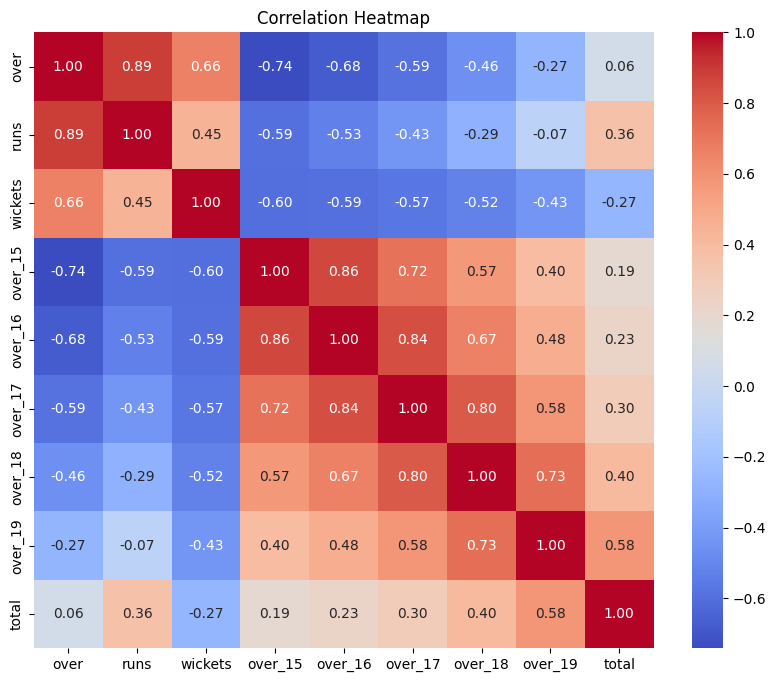

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
numeric_cols = min_df.select_dtypes(include=['int64', 'float64'])

# Generate correlation matrix
correlation_matrix = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
min_df

,batting_team,bowling_team,over,runs,wickets,over_15,over_16,over_17,over_18,over_19,total
26,Kolkata Knight Riders,Royal Challengers Bangalore,4,54,0,154,158,172,179,200,222
27,Kolkata Knight Riders,Royal Challengers Bangalore,4,55,0,154,158,172,179,200,222
28,Kolkata Knight Riders,Royal Challengers Bangalore,4,59,0,154,158,172,179,200,222
29,Kolkata Knight Riders,Royal Challengers Bangalore,4,59,0,154,158,172,179,200,222
30,Kolkata Knight Riders,Royal Challengers Bangalore,4,60,0,154,158,172,179,200,222
...,...,...,...,...,...,...,...,...,...,...,...
242624,Mumbai Indians,Sunrisers Hyderabad,17,198,2,0,0,0,201,201,201
242625,Mumbai Indians,Sunrisers Hyderabad,17,199,2,0,0,0,201,201,201
242626,Mumbai Indians,Sunrisers Hyderabad,17,200,2,0,0,0,201,201,201
242627,Mumbai Indians,Sunrisers Hyderabad,17,200,2,0,0,0,201,201,201


In [ ]:
min_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121998 entries, 26 to 242628
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   batting_team  121998 non-null  object
 1   bowling_team  121998 non-null  object
 2   over          121998 non-null  int64 
 3   runs          121998 non-null  int64 
 4   wickets       121998 non-null  int64 
 5   over_15       121998 non-null  int64 
 6   over_16       121998 non-null  int64 
 7   over_17       121998 non-null  int64 
 8   over_18       121998 non-null  int64 
 9   over_19       121998 non-null  int64 
 10  total         121998 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 11.2+ MB


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
for col in ['batting_team', 'bowling_team']:
  min_df[col] = le.fit_transform(min_df[col])
min_df.head()

,batting_team,bowling_team,over,runs,wickets,over_15,over_16,over_17,over_18,over_19,total
26,2,6,4,54,0,154,158,172,179,200,222
27,2,6,4,55,0,154,158,172,179,200,222
28,2,6,4,59,0,154,158,172,179,200,222
29,2,6,4,59,0,154,158,172,179,200,222
30,2,6,4,60,0,154,158,172,179,200,222


In [ ]:
min_df['batting_team'].unique()

array([2, 6, 0, 4, 3, 5, 7, 1])

In [ ]:
from sklearn.compose import ColumnTransformer
columnTransformer = ColumnTransformer([('encoder',
                                        OneHotEncoder(),
                                        [0, 1])],
                                      remainder='passthrough')

In [ ]:
min_df = np.array(columnTransformer.fit_transform(min_df))

In [ ]:
cols = ['batting_team_Chennai Super Kings', 'batting_team_Delhi Capitals', 'batting_team_Punjab Kings',
              'batting_team_Kolkata Knight Riders', 'batting_team_Mumbai Indians', 'batting_team_Rajasthan Royals',
              'batting_team_Royal Challengers Bangalore', 'batting_team_Sunrisers Hyderabad',
              'bowling_team_Chennai Super Kings', 'bowling_team_Delhi Capitals', 'bowling_team_Punjab Kings',
              'bowling_team_Kolkata Knight Riders', 'bowling_team_Mumbai Indians', 'bowling_team_Rajasthan Royals',
              'bowling_team_Royal Challengers Bangalore', 'bowling_team_Sunrisers Hyderabad', 'over', 'runs', 'wickets', 'over_15',	'over_16',	'over_17',	'over_18',	'over_19', 'total']
df = pd.DataFrame(min_df, columns=cols)

In [ ]:
df.head()

,batting_team_Chennai Super Kings,batting_team_Delhi Capitals,batting_team_Punjab Kings,batting_team_Kolkata Knight Riders,batting_team_Mumbai Indians,batting_team_Rajasthan Royals,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad,bowling_team_Chennai Super Kings,bowling_team_Delhi Capitals,...,bowling_team_Sunrisers Hyderabad,over,runs,wickets,over_15,over_16,over_17,over_18,over_19,total
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,54.0,0.0,154.0,158.0,172.0,179.0,200.0,222.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,55.0,0.0,154.0,158.0,172.0,179.0,200.0,222.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,59.0,0.0,154.0,158.0,172.0,179.0,200.0,222.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,59.0,0.0,154.0,158.0,172.0,179.0,200.0,222.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,60.0,0.0,154.0,158.0,172.0,179.0,200.0,222.0


In [ ]:
# Dropping specified columns to create features DataFrame
features = df.drop(['over_15', 'over_16', 'over_17', 'over_18', 'over_19', 'total'], axis=1)

# Selecting specified columns to create labels DataFrame
labels = df[['over_15', 'over_16', 'over_17', 'over_18', 'over_19', 'total']]


In [ ]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.20, shuffle=True)
print(f"Training Set : {train_features.shape}\nTesting Set : {test_features.shape}")

Training Set : (97598, 19)
Testing Set : (24400, 19)


In [ ]:
models = dict()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
# Train Model
tree.fit(train_features, train_labels)

DecisionTreeRegressor()

In [ ]:
# Evaluate Model
train_score_tree = str(tree.score(train_features, train_labels) * 100)
test_score_tree = str(tree.score(test_features, test_labels) * 100)
print(f'Train Score : {train_score_tree[:5]}%\nTest Score : {test_score_tree[:5]}%')
models["tree"] = test_score_tree

Train Score : 97.01%
Test Score : 86.29%


In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
# Train Model
forest.fit(train_features, train_labels)

RandomForestRegressor()

In [ ]:
# Evaluate Model
train_score_forest = str(forest.score(train_features, train_labels)*100)
test_score_forest = str(forest.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_forest[:5]}%\nTest Score : {test_score_forest[:5]}%')
models["forest"] = test_score_forest

Train Score : 96.44%
Test Score : 90.00%


In [ ]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
# Train Model
linreg.fit(train_features, train_labels)

LinearRegression()

In [ ]:
train_score_linreg = str(linreg.score(train_features, train_labels) * 100)
test_score_linreg = str(linreg.score(test_features, test_labels) * 100)
print(f'Train Score : {train_score_linreg[:5]}%\nTest Score : {test_score_linreg[:5]}%')
models["linreg"] = test_score_linreg

Train Score : 43.03%
Test Score : 43.23%


<BarContainer object of 3 artists>

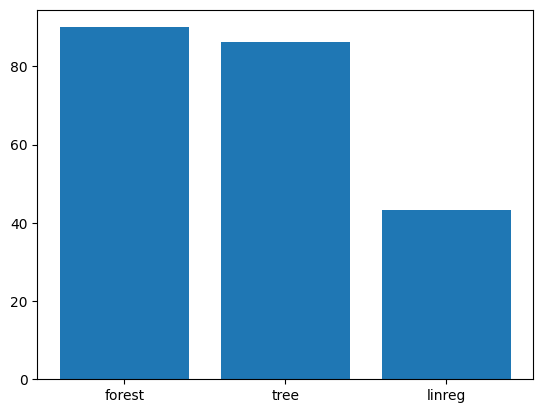

In [ ]:
import matplotlib.pyplot as plt
model_names = list(models.keys())
accuracy = list(map(float, models.values()))
# creating the bar plot
plt.bar(model_names, accuracy)

In [ ]:
import numpy as np

def score_predict(batting_team, bowling_team, over, runs, wickets, model=forest):
  prediction_array = []
  # Batting Team
  if batting_team == 'Chennai Super Kings':
    prediction_array = prediction_array + [1,0,0,0,0,0,0,0]
  elif batting_team == 'Delhi Capitals':
    prediction_array = prediction_array + [0,1,0,0,0,0,0,0]
  elif batting_team == 'Punjab Kings':
    prediction_array = prediction_array + [0,0,1,0,0,0,0,0]
  elif batting_team == 'Kolkata Knight Riders':
    prediction_array = prediction_array + [0,0,0,1,0,0,0,0]
  elif batting_team == 'Mumbai Indians':
    prediction_array = prediction_array + [0,0,0,0,1,0,0,0]
  elif batting_team == 'Rajasthan Royals':
    prediction_array = prediction_array + [0,0,0,0,0,1,0,0]
  elif batting_team == 'Royal Challengers Bangalore':
    prediction_array = prediction_array + [0,0,0,0,0,0,1,0]
  elif batting_team == 'Sunrisers Hyderabad':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,1]
  # Bowling Team
  if bowling_team == 'Chennai Super Kings':
    prediction_array = prediction_array + [1,0,0,0,0,0,0,0]
  elif bowling_team == 'Delhi Capitals':
    prediction_array = prediction_array + [0,1,0,0,0,0,0,0]
  elif bowling_team == 'Punjab Kings':
    prediction_array = prediction_array + [0,0,1,0,0,0,0,0]
  elif bowling_team == 'Kolkata Knight Riders':
    prediction_array = prediction_array + [0,0,0,1,0,0,0,0]
  elif bowling_team == 'Mumbai Indians':
    prediction_array = prediction_array + [0,0,0,0,1,0,0,0]
  elif bowling_team == 'Rajasthan Royals':
    prediction_array = prediction_array + [0,0,0,0,0,1,0,0]
  elif bowling_team == 'Royal Challengers Bangalore':
    prediction_array = prediction_array + [0,0,0,0,0,0,1,0]
  elif bowling_team == 'Sunrisers Hyderabad':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,1]
  prediction_array = prediction_array + [ over, runs, wickets]
  prediction_array = np.array([prediction_array])
  pred = model.predict(prediction_array)
  rounded_pred = np.round(pred).astype(int)
  score = np.array(rounded_pred).flatten()
  return score

In [ ]:
batting_team='Delhi Capitals'
bowling_team='Chennai Super Kings'
score = score_predict(batting_team, bowling_team, over=10, runs=100, wickets=2)

print(score)


[131 144 154 161 172 176]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
batting_team='Delhi Capitals'
bowling_team='Chennai Super Kings'
score = score_predict(batting_team, bowling_team, over=7, runs=80, wickets=6)

print(score)

[ 96 100 103 107 109 111]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[109 122 128 135 141 155]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


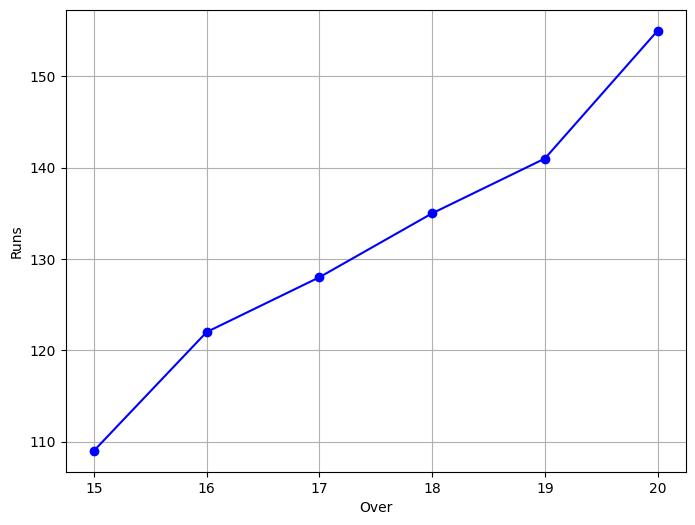

In [ ]:

batting_team='Chennai Super Kings'
bowling_team='Punjab Kings'
score = score_predict(batting_team, bowling_team, over=10, runs=80, wickets=2)

print(score)



predicted_runs = score

# Extracting overs
overs = np.arange(15, 21)

# Plotting the graph
plt.figure(figsize=(8, 6))
plt.plot(overs, predicted_runs.flatten(), marker='o', linestyle='-', color='b')
plt.xlabel("Over")
plt.ylabel("Runs")
plt.xticks(overs)
plt.grid(True)
plt.show()

Here's how you can interpret the output:

The first element (index 0) represents the predicted score for over 15.
The second element (index 1) represents the predicted score for over 16.
The third element (index 2) represents the predicted score for over 17.
The fourth element (index 3) represents the predicted score for over 18.
The fifth element (index 4) represents the predicted score for over 19.
The last element (index 5) represents the predicted total score.

In [ ]:
import joblib
joblib.dump(forest, 'model.pkl')

['model.pkl']

In [ ]:
loaded_model = joblib.load('model.pkl')